## 라이브러리 import

In [96]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np
from numpy import argmax
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import copy
from urllib import request
from PIL import Image
import joblib

## 데이터 준비 (For test)

In [20]:
transform = transforms.Compose([
        transforms.Resize((224,244), interpolation=2),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

batch_size = 1 #보여주는 1장 이미지 

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(dataset=trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=0)

testset=torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(dataset=testset, batch_size=batch_size,
                                         shuffle=False, num_workers=0)

dataloaders = {'train' : trainloader, 'val' : testloader }
dataset_sizes = { 'train' : len(trainset) , 'val' : len(testset) }

class_names = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print("10가지 카테고리")
print(class_names)

Files already downloaded and verified
Files already downloaded and verified
10가지 카테고리
('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


## 모델 불러오기

In [69]:
from keras.models import load_model
model = joblib.load('model18.pkl') 

## 모델 사용
### a. 저장된 파일 이미지 확인

Upload image FILE
Actual size: (629, 781, 3)


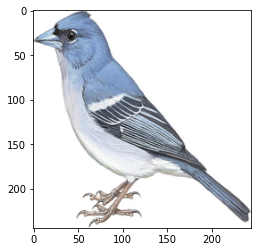

Resize:  (244, 244, 3)

Upload image FILE
Actual size: (698, 1240, 3)


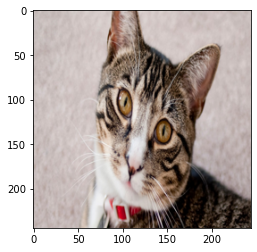

Resize:  (244, 244, 3)

Upload image FILE
Actual size: (200, 314, 3)


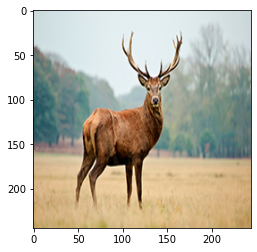

Resize:  (244, 244, 3)



In [93]:
file_path =[
    './image/animal/bird.jpg',
    './image/animal/cat.jpg',
    './image/animal/deer.jpg'    
]
for img in file_path:
    image = Image.open(img)
    reimg = image.resize((244,244))
    
    #file 이미지 실제 사이즈와 재조정한 사이즈
    reimg = np.array(reimg) 
    image = np.array(image) 
    
    print("Upload image FILE")
    print("Actual size:",image.shape)    
    plt.imshow(reimg)
    plt.show()
    print("Resize: ",reimg.shape) #(244, 244, 3)
    print()

In [56]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [57]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #GPU 사용가능 여부확인
device

device(type='cuda', index=0)

In [91]:
# 예측을 위한 tranform 적용한 tensor 데이터 준비
fileimage = datasets.ImageFolder(root='./image',transform=transform) 
fileloader = torch.utils.data.DataLoader(dataset=fileimage, batch_size=3, shuffle=False)
dataiter = iter(fileloader)
images, _ = dataiter.next()

### b.이미지 예측

Upload image FILE..


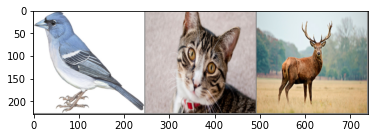

This is    bird    cat   deer


In [92]:
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print('Upload image FILE..')
plt.show() # 3개 정도 이미지
outputs = model(images.to(device))
_, predicted = torch.max(outputs, 1)

print('This is ', ' '.join('%6s' % class_names[predicted[j]] for j in range(3) ))

### a.링크 이미지 확인

In [61]:
url = [ 
    "https://renault.jo/CountriesData/Jordan_EN/images/conceptcars/renault-concept-car-014_ig_w800_h450.jpg",
    "https://blog.hmgjournal.com/images_n/contents/170421_dog01.png",
    "https://www.sciencetimes.co.kr/wp-content/uploads/2019/06/Beagle_portrait_Camry.jpg",
    "https://www-trucknbus.hyundai.com/kr/images/product/cars/hd36l/mega-truck.jpg"
]

In [62]:
n=0
for u in url:
    # 링크파일 저장 (link0.jpg, link1.jpg ...)
    request.urlretrieve(u, "./image/link/0/link"+str(n)+".jpg") 
    n+=1

Upload image URL FIle
Actual size: (450, 800, 3)


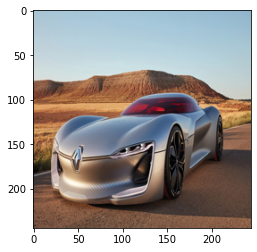

Resize: (244, 244, 3)

Upload image URL FIle
Actual size: (534, 711, 3)


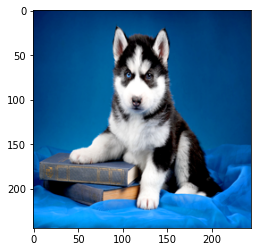

Resize: (244, 244, 3)

Upload image URL FIle
Actual size: (320, 480, 3)


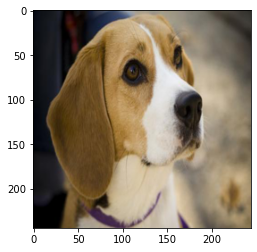

Resize: (244, 244, 3)

Upload image URL FIle
Actual size: (890, 1920, 3)


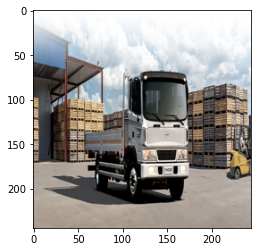

Resize: (244, 244, 3)



In [94]:
from io import BytesIO
for u in url:
    res = request.urlopen(u).read() #URL open
    image = Image.open(BytesIO(res))
    reimg = image.resize((244,244))
    
    #URL 이미지 실제 사이즈와 재조정한 사이즈
    reimg = np.array(reimg) 
    image = np.array(image) 
    
    print("Upload image URL FIle")
    print("Actual size:",image.shape)
    plt.imshow(reimg)
    plt.show()
    
    print("Resize:",reimg.shape) 
    print()

In [64]:
# 예측을 위한 tranform 적용한 tensor 데이터 준비
fileimage = datasets.ImageFolder(root='./image/link',transform=transform) 
fileloader = torch.utils.data.DataLoader(dataset=fileimage, batch_size=4, shuffle=False)
dataiter = iter(fileloader)
images, _ = dataiter.next()

### b.이미지 예측

Upload image URL FILE..


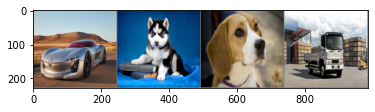

This is     car    dog    dog  truck



In [68]:
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print('Upload image URL FILE..')
plt.show() # 4개 정도 이미지
outputs = model(images.to(device))
_, predicted = torch.max(outputs, 1)
print('This is ', ' '.join('%6s' % class_names[predicted[j]] for j in range(4) ))
print()